In [2]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>CROCKER plots for bifurcation analysis</i></h1>
    <h3><i>Module 2-3</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Sunia Tanweer
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

## Goals of this module

- Define CROCKER plots
- Understand basic interpretation and connection to persistence diagrams
- See potential connections to analyzing parameterized families of dynamical systems

## References 

- İsmail Güzel, Elizabeth Munch, and Firas A. Khasawneh. *Detecting bifurcations in dynamical systems with CROCKER plots*,  CHAOS, 2022. [DOI:10.1063/5.0102421](https://doi.org/10.1063/5.0102421)
- C. M. Topaz, L. Ziegelmeier and T. Halverson. *Topological data analysis of biological aggregation models*, PloS One, 10 (2015), [DOI:10.1371/journal.pone.0126383](http://dx.doi.org/10.1371/journal.pone.0126383).


In [3]:
# Make sure to run these imports
import numpy as np
import matplotlib.pyplot as plt

from ripser import ripser
from teaspoon.TDA.Draw import drawDgm, drawPtCloud
from teaspoon.MakeData.PointCloud import Annulus

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Betti Curves


<div class = 'row'>
<div class = 'column'>
    
# Recall
 
The Betti number $\beta_p(K)$ is the dimension of the $p$-dimensional homology, $\dim(H_p(K))$
    
# The Betti Curve 

Given a filtration $K_0 \subseteq K_1 \subseteq \cdots K_n$
the Betti curve is a function 
    $$t \mapsto \left(\beta_i (K_{\lfloor t \rfloor})\right).$$
    
</div>
<div class = 'column'>


        
</div>
</div>



# Example

In [4]:
# Run this to get the code for the Betti Curve
def BettiCurve(Dgm, maxEps = 3, numStops = 10):

    vecOfThresholds = np.linspace(0,maxEps,numStops)
    BettiCurve = np.zeros(np.shape(vecOfThresholds))

    for i,v in enumerate(vecOfThresholds):
        BettiCurve[i] = sum(np.logical_and((Dgm[:,0]<v), (Dgm[:,1] >v) ))

    return vecOfThresholds,BettiCurve

def drawingBettiCurve(A,Dgm,t,x):
    # Drawing 
    fig = plt.figure(figsize = (9,3))
    plt.subplot(1,3,1)
    drawPtCloud(A)
    plt.axis('square')
    plt.subplot(1,3,2)
    drawDgm(Dgm)
    plt.axis('square')
    plt.subplot(1,3,3)
    plt.step(t,x)
    plt.xlabel
    ax = plt.gca()
    ax.set(xlabel='Filtration Parameter', ylabel='Betti number')


    plt.subplots_adjust( wspace = 0.3)

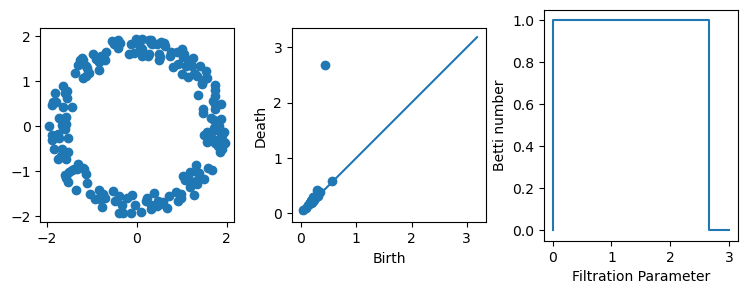

In [5]:
# 1-dimensional diagram of the annulus
A = Annulus(r = 1.5, R = 2)
Dgm = ripser(A,2)['dgms'][1]
t,x = BettiCurve(Dgm,3,10)
drawingBettiCurve(A,Dgm,t,x)

# CROCKER plots


<div class = 'row'>
<div class = 'column'>
    

# Definition 

    
- Given a parameterized family of input filtered complexes $\{ K^t \mid t \in T\}$. 
- Fix thresholds for filtration parameter $\{ a_1 \leq a_2 \cdots \leq a_n\}$
- Plot the Betti curve for a fixed input filtered complex vertically, stack Betti curves horizontally. 
 

    
</div>
<div class = 'column'>


        
</div>
</div>


# Some examples with bifurcations

stuff from ismail's paper

# You try it 

<div class = 'row'>
<div class = 'column'>
    
- Open the [2-3-Wkst-CrockerPlots.ipynb](2-3-Wkst-CrockerPlots.ipynb) notebook and get started! 
- The notebook has both a basic example, and a challenge version.
- Answers are included but hidden.
- We will come back together in 10-15 minutes to start on the next module.
    
</div>
<div class = 'column'>

    UPDATE ME!
![](figures/Screenshot-1-1-Wkst.png)
        
</div>
</div>